<a href="https://colab.research.google.com/github/Reactodactyl/Shopify_App_Platform_EDA/blob/main/shopify_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Shopify App Store Exploratory Data Analysis Using

## Web scraped data of apps and reviews from Shopify apps marketplace

https://www.kaggle.com/datasets/usernam3/shopify-app-store/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


## Dataset Download


In [ ]:

from zipfile import ZipFile
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# Set the Kaggle dataset URL and the destination folder for downloading
dataset_url = 'usernam3/shopify-app-store'
destination_folder = 'shopify_dataset'

# Check if the dataset already exists
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

    # Download the dataset
    api.dataset_download_files(dataset_url, path=destination_folder, unzip=True)

    # Extract the downloaded zip file
    zip_file_path = os.path.join(destination_folder, 'archive.zip')
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_folder)

    # Remove the zip file after extraction { WILL THROW AN ERROR .BUT IT'S OKAY :)}
    os.remove(zip_file_path)

    print("Dataset downloaded successfully.")
else:
    print("Dataset already exists. Skipping download.")

# WILL THROW AN ERROR .BUT IT'S OKAY :)

FileNotFoundError: ignored

## Data Imports


In [ ]:
apps_df = pd.read_csv('shopify_dataset/apps.csv')
apps_categories_df = pd.read_csv('shopify_dataset/apps_categories.csv')
categories_df = pd.read_csv('shopify_dataset/categories.csv')
key_benefits_df = pd.read_csv('shopify_dataset/key_benefits.csv')
pricing_plan_features_df = pd.read_csv('shopify_dataset/pricing_plan_features.csv')
pricing_plans_df = pd.read_csv('shopify_dataset/pricing_plans.csv')
reviews_df = pd.read_csv('shopify_dataset/reviews.csv')


## Data Exploration and Cleaning


In [ ]:
apps_df.head()

,id,url,title,developer,developer_link,icon,rating,reviews_count,description_raw,description,tagline,pricing_hint,lastmod
0,afbe525f-d512-4951-8edc-582df3ce6aa7,https://apps.shopify.com/jewelexchange_feed,JewelExchange Product Feed API,Avalon Solution,https://apps.shopify.com/partners/avalon-solution,https://cdn.shopify.com/app-store/listing_imag...,0.0,0,"<div class=""block vc-app-listing-about-section...",JewelExchange is a cloud-based platform for Je...,"Connecting Retailers & Suppliers (Jewelry, Wat...",Free to install. Additional charges may apply.,2022-05-09
1,9594ccfa-9ef9-42a2-823c-e270489bcb88,https://apps.shopify.com/cocon-app,"COCON ‑ Emails, Popup",COCON SA,https://apps.shopify.com/partners/cocon-sa,https://cdn.shopify.com/app-store/listing_imag...,5.0,3,"<div class=""block vc-app-listing-about-section...",What is COCON? \n\n Set up in less than 15 min...,"Email Marketing, Popup, Automation, Analytics",Free plan available. 14-day free trial. Additi...,2022-06-04
2,cd229797-5798-4465-a313-2e27ce44e01d,https://apps.shopify.com/quantify,Quantify,Akuna Technologies,https://apps.shopify.com/partners/shopifytech,https://cdn.shopify.com/app-store/listing_imag...,3.3,14,"<div class=""block vc-app-listing-about-section...",Setting minimum and maximum quantities in your...,Setting Min-Max Quantities now made Easy,$3.99/month. 7-day free trial.,2022-05-19
3,6e07c6c8-8617-43d2-9a88-bafcbfe82f7f,https://apps.shopify.com/orderlyprint,OrderlyPrint,FORSBERG+two ApS,https://apps.shopify.com/partners/forsberg-two,https://cdn.shopify.com/app-store/listing_imag...,4.9,124,"<div class=""block vc-app-listing-about-section...","OrderlyPrint helps with your pick lists, packi...","Pick, pack, invoice, fulfill & export your ord...",From $29/month. 15-day free trial.,2022-05-19
4,8ff58c99-e85c-44cd-ad13-7df88fbab704,https://apps.shopify.com/smsbump,SMSBump SMS Marketing by Yotpo,SMSBump Ltd,https://apps.shopify.com/partners/isenselabs,https://cdn.shopify.com/app-store/listing_imag...,4.8,2246,"<div class=""block vc-app-listing-about-section...",What is Yotpo SMSBump? \n Yotpo SMSBump is a p...,"Text Marketing, Abandoned Cart Recovery, SMS A...",Free to install. Additional charges may apply.,2022-05-13


In [ ]:
# DROP
# url
#developer link
# icon
# lastmod
# description_raw
# description
# tagline
# lastmod
#pricing_hint

apps_df = apps_df.rename({'id':'app_id'}, axis=1)
apps_df=apps_df.drop(['url','developer_link','icon','lastmod','description_raw','description','tagline','pricing_hint'],axis = 1)
apps_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7341 entries, 0 to 7340
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   app_id         7341 non-null   object 
 1   title          7341 non-null   object 
 2   developer      7341 non-null   object 
 3   rating         7341 non-null   float64
 4   reviews_count  7341 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 286.9+ KB


In [ ]:
apps_categories_df.info()
apps_categories_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10164 entries, 0 to 10163
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       10164 non-null  object
 1   category_id  10164 non-null  object
dtypes: object(2)
memory usage: 158.9+ KB


,app_id,category_id
0,afbe525f-d512-4951-8edc-582df3ce6aa7,c769c2bd15500dd906102d9be97fdceb
1,afbe525f-d512-4951-8edc-582df3ce6aa7,3be6496a88459c633342f1ec6e2be5f4
2,9594ccfa-9ef9-42a2-823c-e270489bcb88,c3f9db73c29bc33607778f9935c3c4dc
3,9594ccfa-9ef9-42a2-823c-e270489bcb88,c769c2bd15500dd906102d9be97fdceb
4,9594ccfa-9ef9-42a2-823c-e270489bcb88,8a496e4dcb443b1c529e75d7ec2888df


In [ ]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9 non-null      object
 1   title   9 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [ ]:
key_benefits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       19998 non-null  object
 1   title        19998 non-null  object
 2   description  19998 non-null  object
dtypes: object(3)
memory usage: 468.8+ KB


In [ ]:
pricing_plan_features_df.info()
pricing_plan_features_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42107 entries, 0 to 42106
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   app_id           42107 non-null  object
 1   pricing_plan_id  42107 non-null  object
 2   feature          42107 non-null  object
dtypes: object(3)
memory usage: 987.0+ KB


,app_id,pricing_plan_id,feature
0,5db4ab6c-c3b6-43af-8b47-e439b376ff80,9594ccfa-9ef9-42a2-823c-e270489bcb88,Email capture
1,5db4ab6c-c3b6-43af-8b47-e439b376ff80,9594ccfa-9ef9-42a2-823c-e270489bcb88,Abandoned carts recovery
2,5db4ab6c-c3b6-43af-8b47-e439b376ff80,9594ccfa-9ef9-42a2-823c-e270489bcb88,Browsing history
3,5db4ab6c-c3b6-43af-8b47-e439b376ff80,9594ccfa-9ef9-42a2-823c-e270489bcb88,Analytics data
4,5db4ab6c-c3b6-43af-8b47-e439b376ff80,9594ccfa-9ef9-42a2-823c-e270489bcb88,Chat support 7/7


In [ ]:
pricing_plans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12201 entries, 0 to 12200
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      12201 non-null  object
 1   app_id  12201 non-null  object
 2   title   9950 non-null   object
 3   price   12201 non-null  object
dtypes: object(4)
memory usage: 381.4+ KB


In [ ]:
reviews_df.info()

# Removing unneccessary data

reviews_df = reviews_df.drop(
    [
        "posted_at",
        "author",
        "body",
        "helpful_count",
        "developer_reply",
        "developer_reply_posted_at",
    ],
    axis=1,
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640633 entries, 0 to 640632
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   app_id                     640633 non-null  object
 1   author                     640543 non-null  object
 2   rating                     640633 non-null  int64 
 3   posted_at                  640633 non-null  object
 4   body                       640472 non-null  object
 5   helpful_count              640633 non-null  int64 
 6   developer_reply            131483 non-null  object
 7   developer_reply_posted_at  131483 non-null  object
dtypes: int64(2), object(6)
memory usage: 39.1+ MB


In [ ]:
reviews_df.head()

,app_id,rating
0,8ff58c99-e85c-44cd-ad13-7df88fbab704,5
1,8ff58c99-e85c-44cd-ad13-7df88fbab704,5
2,8ff58c99-e85c-44cd-ad13-7df88fbab704,5
3,8ff58c99-e85c-44cd-ad13-7df88fbab704,5
4,8ff58c99-e85c-44cd-ad13-7df88fbab704,5


## Data Transformation

### Add category titles to app_categories DataFrame

In [ ]:
app_cat_col = apps_categories_df.category_id.map(categories_df.set_index('id').title)
apps_categories_df['category_title'] = app_cat_col

### Multi-Label Classification of Apps in the App Store

In [ ]:


app_cat_no_dupl_df = pd.DataFrame()
app_cat_no_dupl_df["app_id"] = apps_categories_df["app_id"].unique()

# add columns for each category
cat_titles = categories_df["title"].tolist()

for cat_name in cat_titles:
    app_cat_no_dupl_df[cat_name] = [0] * len(app_cat_no_dupl_df.index)

# returns dict keys:app_id and values: list of axis labels
grouped_app_info = apps_categories_df.groupby("app_id")


app_cat_no_dupl_df["app_id"] = grouped_app_info.indices.keys()

# set the index as the app_id
app_cat_no_dupl_df = app_cat_no_dupl_df.set_index(["app_id"])


for app_id, cat_arr in grouped_app_info:
    included_cat = cat_arr.category_title.tolist()
    app_cat_no_dupl_df.loc[f"{app_id}"][[f"{cat}" for cat in included_cat]] = 1


app_cat_no_dupl_df.head(10)

,Marketing,Store management,Store design,Conversion,Merchandising,Fulfillment,Shipping and delivery,Customer service,Sourcing and selling products
app_id,,,,,,,,,
002023de-1707-46d2-8cf4-919be20bfd32,0,0,0,1,1,1,0,0,0
00210ef0-4b8d-4adc-a414-2ba93e8e30ff,1,1,0,0,0,1,0,0,0
0023b916-e3e7-420f-980b-c998eb092c66,1,0,0,0,1,0,0,0,0
002bc703-5857-4d3c-8696-0a1a8d49b9a1,0,0,0,0,1,0,0,0,0
0047561b-c560-4054-89e9-5aef78faea43,0,0,1,0,0,0,0,0,0
004c2970-953b-45b3-b693-5d02979d5372,0,0,0,0,0,0,0,1,0
006d21ba-cace-4d4a-8c58-a5f503742b67,0,0,0,0,0,0,1,0,0
0082b26e-0819-4649-b545-b87dacf0f7c3,0,0,0,0,0,0,0,1,0
0084174e-7110-40d1-a234-07da062e6b98,0,1,0,0,0,0,0,0,0


#### App Store Category Volume (Multi-Labelled)

In [ ]:
cat_count = pd.DataFrame(
    data=app_cat_no_dupl_df[cat_titles].sum(axis=0),
    index=cat_titles,
    columns=["Number of Apps"],
)

print(cat_count)

                               Number of Apps
Marketing                                1571
Store management                         1001
Store design                             1671
Conversion                               1630
Merchandising                             876
Fulfillment                              1027
Shipping and delivery                     751
Customer service                          964
Sourcing and selling products             673


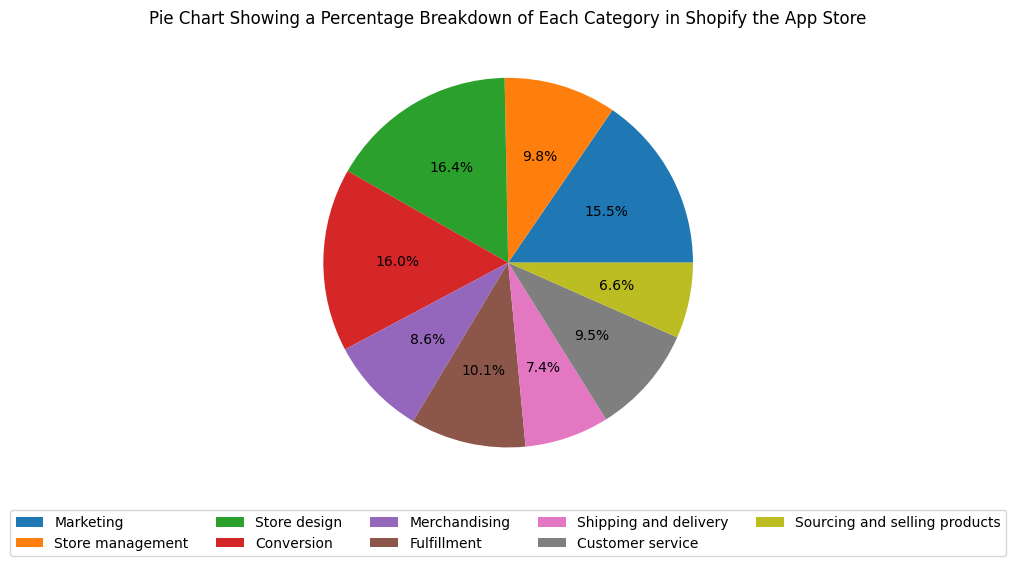

In [ ]:
fig = plt.figure(figsize=(9, 6))
plt.title("Pie Chart Showing a Percentage Breakdown of Each Category in Shopify the App Store")

plt.pie(
    cat_count["Number of Apps"],
    autopct="%1.1f%%",
)
plt.legend(
    cat_titles,
    bbox_to_anchor=(0.5, -0.15), ncol=5,
    loc="lower center",
    fontsize=10,
)

##### Conversion, Store Design and Marketing are the most labelled categories in the Shopify Dataset. These labels collectively represent 47.9 percent of all category labels.

### Average rating of each Application on the App Store

In [ ]:
app_avg_ratings = reviews_df.groupby("app_id")


app_avg_rating_df = pd.DataFrame(
    {"Average Rating": app_avg_ratings["rating"].mean().round(2)}
)

app_avg_rating_df.head(10)

,Average Rating
app_id,
002023de-1707-46d2-8cf4-919be20bfd32,4.86
00210ef0-4b8d-4adc-a414-2ba93e8e30ff,5.00
0023b916-e3e7-420f-980b-c998eb092c66,5.00
002bc703-5857-4d3c-8696-0a1a8d49b9a1,3.87
004c2970-953b-45b3-b693-5d02979d5372,4.59
0082b26e-0819-4649-b545-b87dacf0f7c3,5.00
00868819-4005-41bb-bec2-b3568a6d110d,4.79
009ff552-27b9-41d6-a970-a0aa883b2099,5.00
00ae0730-70bb-4145-973d-7422ed119807,5.00


In [ ]:
app_avg_rating_df.describe()

,Average Rating
count,5055.000000
mean,4.464793
std,0.875271
min,1.000000
25%,4.340000
50%,4.830000
75%,5.000000
max,5.000000


##### There was a total of 7341 application in the dataset. However, only 5055 applications (68.85%) received atleast a single rating on the app store. Additionally, the average ratings distribution is skewed as shown in the table describing the dataset above.

### Number of Reviews for Each Application in the DataSet

In [ ]:
app_avg_rating_df["Review Count"] = app_avg_ratings["rating"].count()
display(app_avg_rating_df)

,Average Rating,Review Count
app_id,,
002023de-1707-46d2-8cf4-919be20bfd32,4.86,51
00210ef0-4b8d-4adc-a414-2ba93e8e30ff,5.00,5
0023b916-e3e7-420f-980b-c998eb092c66,5.00,5
002bc703-5857-4d3c-8696-0a1a8d49b9a1,3.87,15
004c2970-953b-45b3-b693-5d02979d5372,4.59,59
...,...,...
ffbfe061-817d-40d1-9ef8-39aaa4dcb7cc,4.91,968
ffc1709d-3569-462e-bb5e-b8eb0e926c18,4.21,42
ffe11f11-edfe-462f-8e8a-ef03d9777163,5.00,29


## Producing the Weighted Rating for each Application
### Using the number of reviews as weights

In [ ]:
# Weighted Average Rating of Each App
app_avg_rating_df["Weighted Rating"] = round(
    app_avg_ratings["rating"].sum()
    * app_avg_ratings["rating"].count()
    / len(app_avg_ratings),
    2,
)
app_avg_rating_df["Weighted Rating"] = app_avg_rating_df["Weighted Rating"].apply(
    lambda x: max(min(x, 5) , 1)
)
display(app_avg_rating_df)

,Average Rating,Review Count,Weighted Rating
app_id,,,
002023de-1707-46d2-8cf4-919be20bfd32,4.86,51,2.50
00210ef0-4b8d-4adc-a414-2ba93e8e30ff,5.00,5,1.00
0023b916-e3e7-420f-980b-c998eb092c66,5.00,5,1.00
002bc703-5857-4d3c-8696-0a1a8d49b9a1,3.87,15,1.00
004c2970-953b-45b3-b693-5d02979d5372,4.59,59,3.16
...,...,...,...
ffbfe061-817d-40d1-9ef8-39aaa4dcb7cc,4.91,968,5.00
ffc1709d-3569-462e-bb5e-b8eb0e926c18,4.21,42,1.47
ffe11f11-edfe-462f-8e8a-ef03d9777163,5.00,29,1.00


Text(0.5, 0, 'Rating')

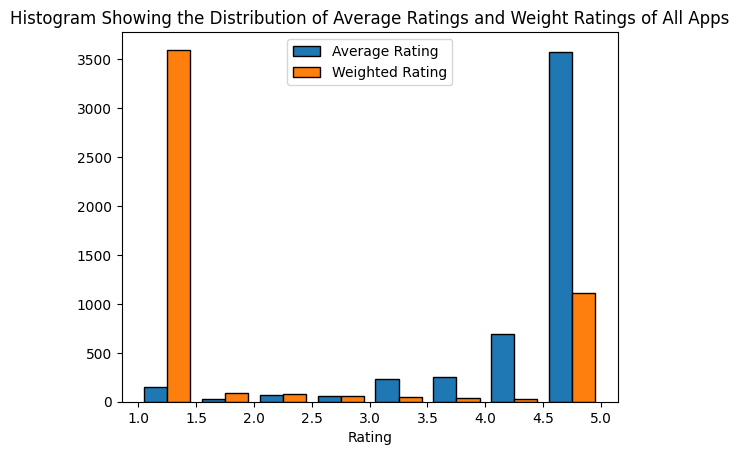

In [ ]:
plt.title(
    "Histogram Showing the Distribution of Average Ratings and Weight Ratings of All Apps"
)
plt.hist(
    app_avg_rating_df[["Average Rating", "Weighted Rating"]],
    bins=np.arange(1, 5.5, 0.5),
    edgecolor="black",
    label=["Average Rating", "Weighted Rating"],
)
plt.legend()
plt.xlabel("Rating")

In [ ]:
app_avg_rating_df["Weighted Rating"].describe()

count    5055.000000
mean        1.997339
std         1.655279
min         1.000000
25%         1.000000
50%         1.000000
75%         2.725000
max         5.000000
Name: Weighted Rating, dtype: float64

##### To gain further insight into the average ratings the weighted average ratings was calculated. The resultant ratings was also skewed to the left as shown in the bar chart above which is indicative that alot of apps didnot have alot of reviews.  

### Top 10 Most Reviewed Application in the Dataset

In [ ]:
top_reviewed_apps = app_avg_rating_df.sort_values(by=["Review Count"], ascending=False)

top_reviewed_apps = top_reviewed_apps.merge(apps_df[["app_id", "title"]], on="app_id")

titles = top_reviewed_apps.pop("title")
top_reviewed_apps.insert(0, "title", titles)

display(top_reviewed_apps[:10])

,title,app_id,Average Rating,Review Count,Weighted Rating
0,"Privy ‑ Pop Ups, Email, & SMS",a66f8834-9975-4392-a70b-8e3ef47817fd,4.63,24774,5.0
1,Free Shipping Bar,c4307ed0-e8cd-48df-a046-6a3e28892fb8,4.87,10848,5.0
2,Judge.me Product Reviews,d5e68a84-b346-4acc-bb15-abc69ccc16b3,4.97,9237,5.0
3,Loox Product Reviews & Photos,5591be5b-d3c8-4370-83c5-3e305ac0fc6c,4.87,8836,5.0
4,Ali Reviews ‑ Product Reviews,44919ff5-9aeb-46a7-9d8a-8ad10664d0d9,4.80,8717,5.0
5,BEST Currency Converter,cb6b633b-2bf2-4a84-a347-4f2cd1ab7684,4.76,8025,5.0
6,Ultimate Sales Boost,ddf5fa4f-7e23-4782-ae70-3aafa96eb302,4.79,7365,5.0
7,POP! Sales & Live Activity Pop,748e83ce-276a-4b79-9f03-be64dca7bd79,4.74,7283,5.0
8,DSers‑AliExpress Dropshipping,739c559c-018a-440d-85a6-227ad229015a,4.95,7145,5.0
9,PageFly Landing Page Builder,18e55485-3cd4-4d1c-8341-19aa2cc4987a,4.90,6472,5.0


In [ ]:
# Compare with app_df for data verification

# display(apps_df.sort_values(by = "reviews_count", ascending = False)[:10])

### Average Ratings Within Each App Category

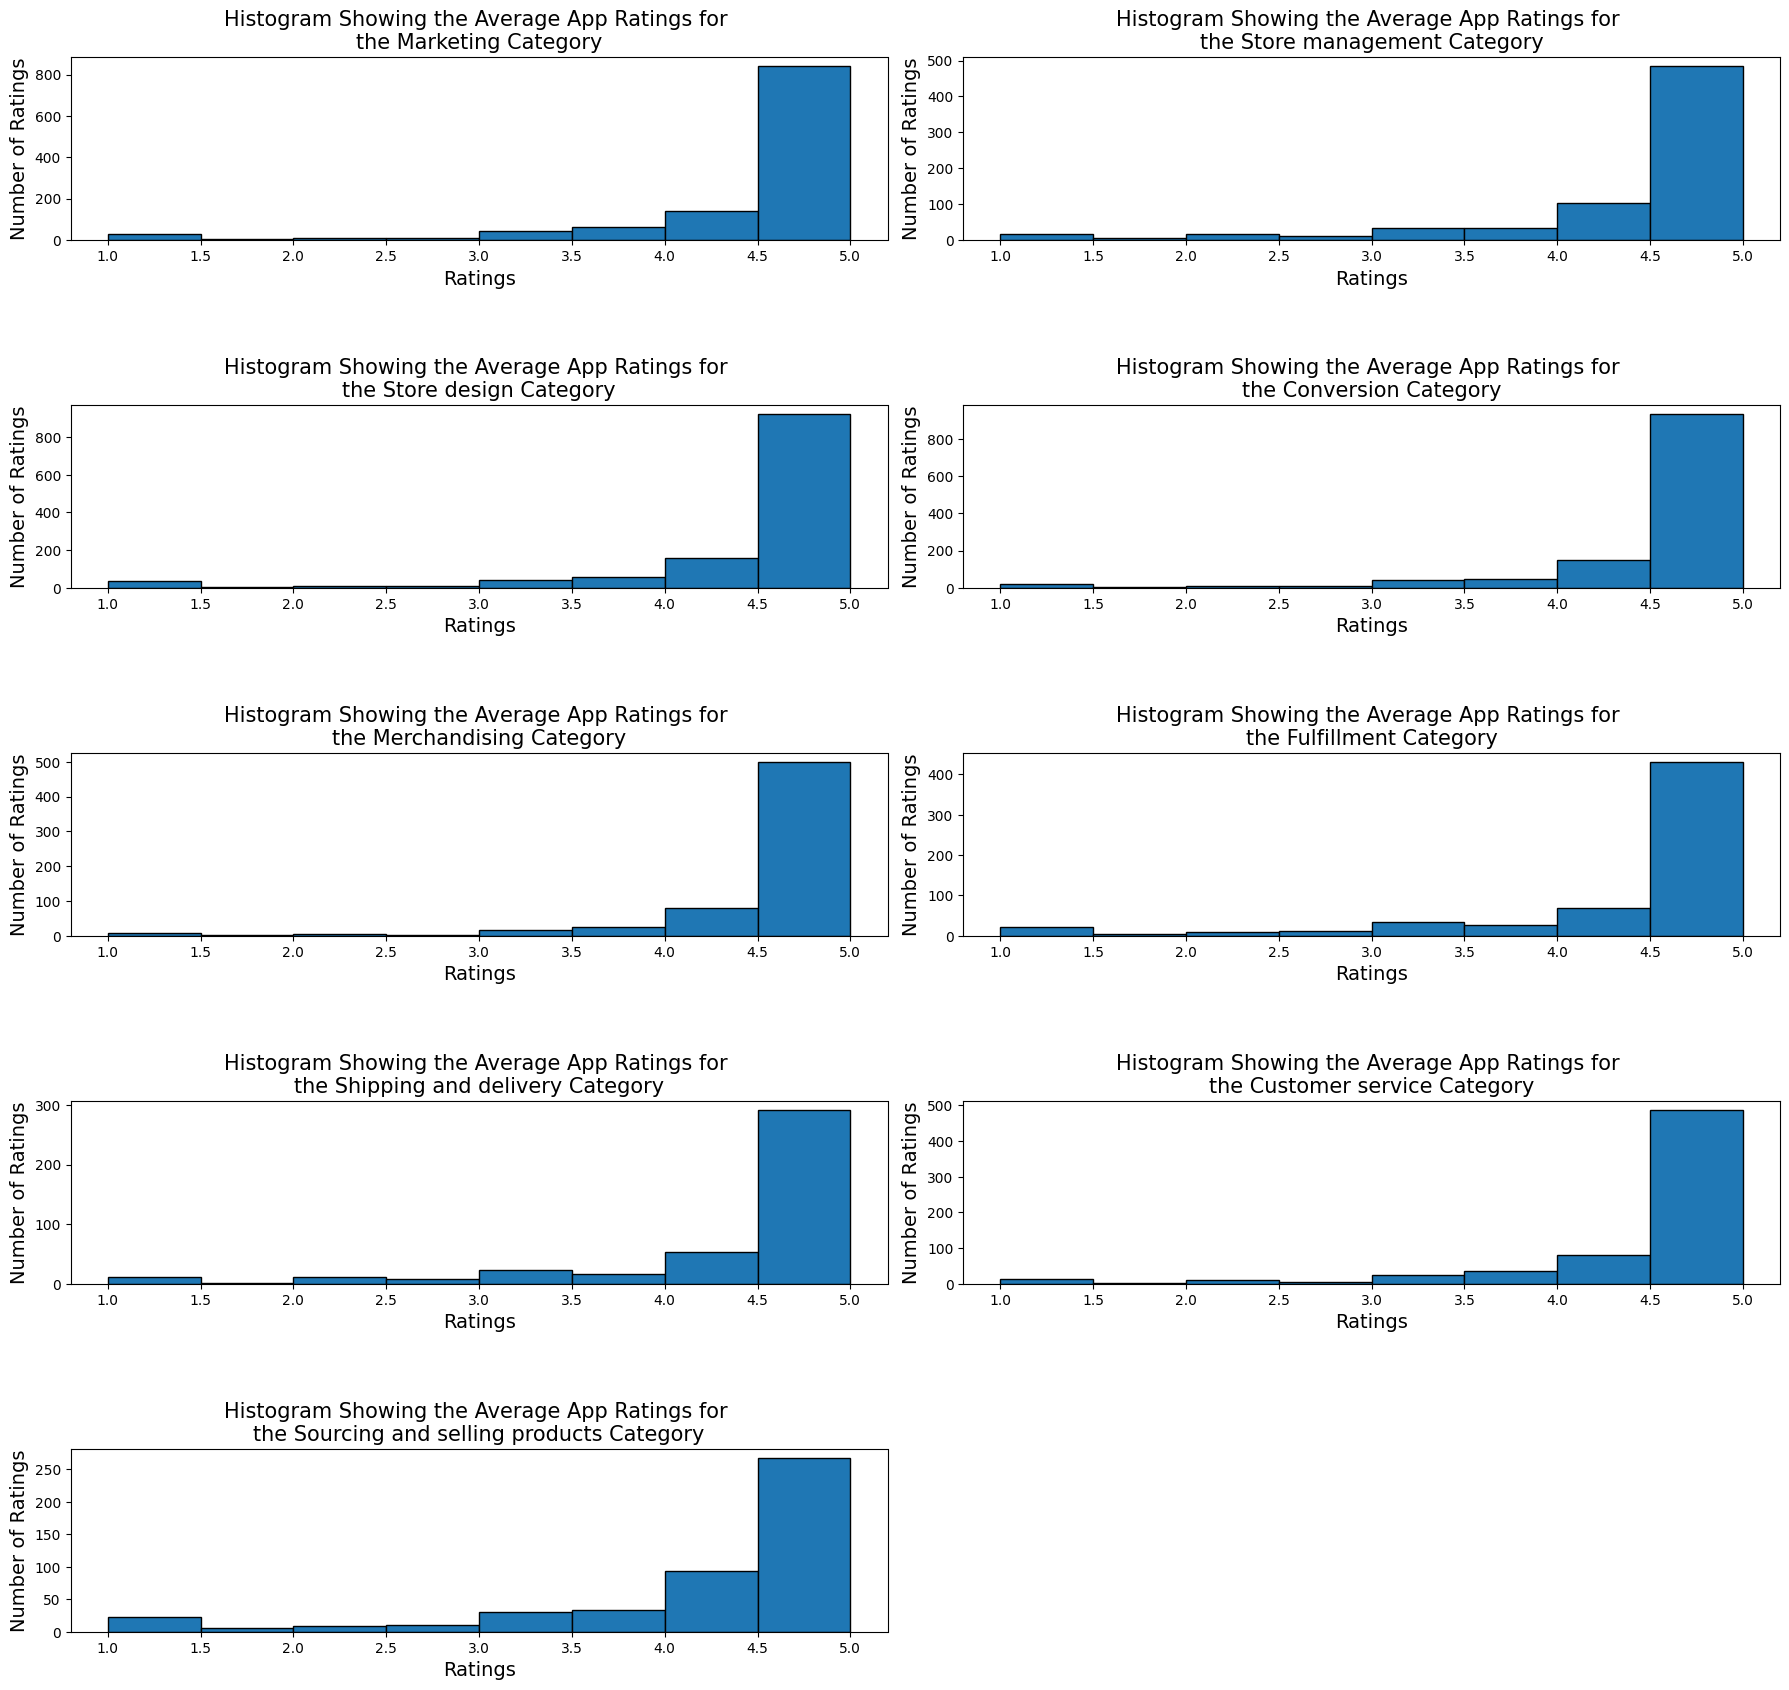

In [ ]:
pos = 1

plt.figure(figsize=(18, 20))


for cat_title in cat_titles:
    cat_app_ids = app_cat_no_dupl_df.loc[app_cat_no_dupl_df[f"{cat_title}"] == 1]
    avg_ratings_per_cat = cat_app_ids.join(app_avg_rating_df, validate="1:1")

    plt.tight_layout(h_pad=5)

    plt.subplot(6, 2, pos)

    plt.title(
        f"Histogram Showing the Average App Ratings for \nthe {cat_title} Category",
        fontsize=15,
    )
    plt.xlabel("Ratings", fontsize=14)
    plt.ylabel("Number of Ratings", fontsize=14)

    plt.hist(
        avg_ratings_per_cat["Average Rating"],
        bins=np.arange(1, 5.5, 0.5),
        edgecolor="black",
        label=["Average Rating", "Weighted Rating"],
    )
    pos += 1

#### The Average Rating across the various Category Label is also skewed similar fashion.

### Intersection between App Categories

In [ ]:
# A Matrix Showing Intersection of  All App Categories as a HeatMap

co_matrix = [[0] * len(cat_titles) for x in cat_titles]

for prim_index, cat_title in enumerate(cat_titles):
    for (
        sec_index,
        sec_cat_title,
    ) in enumerate(cat_titles):
        if sec_cat_title != cat_title :
            co_cat = app_cat_no_dupl_df.loc[
                (app_cat_no_dupl_df[cat_title] == 1)
                & (app_cat_no_dupl_df[sec_cat_title] == 1)
            ]
            co_matrix[prim_index][sec_index] = len(co_cat)
            co_matrix[sec_index][prim_index] = len(co_cat)

# print(co_matrix)

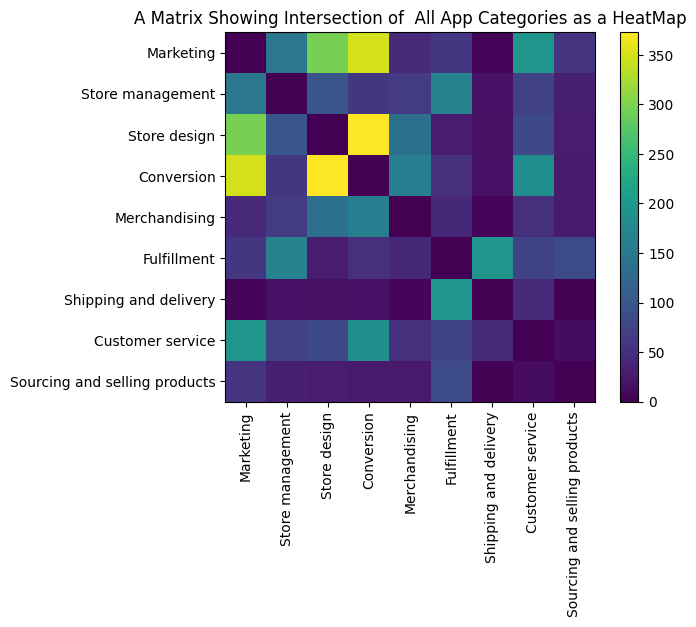

In [ ]:
plt.title("A Matrix Showing Intersection of  All App Categories as a HeatMap")
plt.imshow(co_matrix, cmap="viridis", interpolation="nearest")
plt.colorbar()

plt.xticks(np.arange(len(cat_titles)), cat_titles, rotation=90)
plt.yticks(np.arange(len(cat_titles)), cat_titles)
plt.show()

#### The matrix above shows that Marketing, Store Design and Conversion were the most common intersected labels. This is also supported by the first pie chart

# Shopify Platform Publised Developers Data Insights

## Most Published Developers on the Shopify App Store

In [ ]:
apps_grouped = apps_df[["app_id", "developer", "rating"]].groupby("developer")

developers_df = pd.DataFrame()
developers_df["Developer"] = [app_developer for app_developer, apps in apps_grouped]
developers_df["Number of Published Apps"] = [
    len(apps) for app_developer, apps in apps_grouped
]

most_published_developers_df = developers_df.sort_values(
    by="Number of Published Apps", ascending=False
)

display(most_published_developers_df.head(10))

,Developer,Number of Published Apps
1160,Elfsight,45
4099,Webkul Software Pvt Ltd,43
3387,Smart Ecom Tech,32
3271,Shopify,28
2503,POWR.io,25
2401,Omega,25
646,CedCommerce,22
2324,NexusMedia OÜ,22
3451,SolverCircle,22
407,BOA Ideas,21


<BarContainer object of 10 artists>

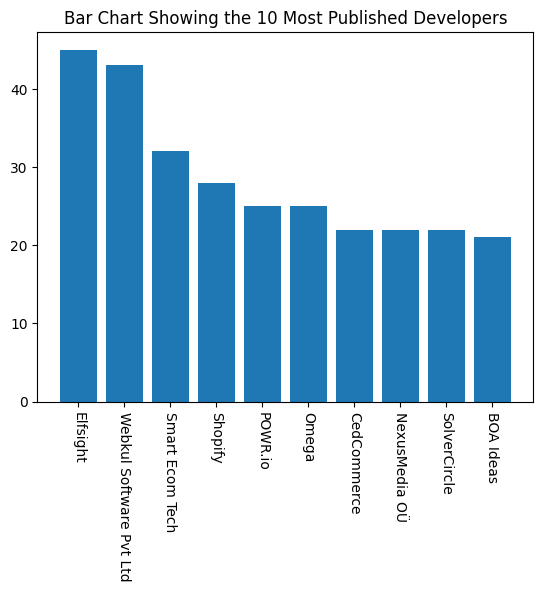

In [ ]:
plt.title("Bar Chart Showing the 10 Most Published Developers")
plt.xticks(rotation=-90)
plt.bar(
    x=most_published_developers_df["Developer"].iloc[:10],
    height=most_published_developers_df["Number of Published Apps"].iloc[:10],
)

#### The App Store has many publishers with varying number of published applications

### App Quality across the medium-large developers using the average rating of published applications

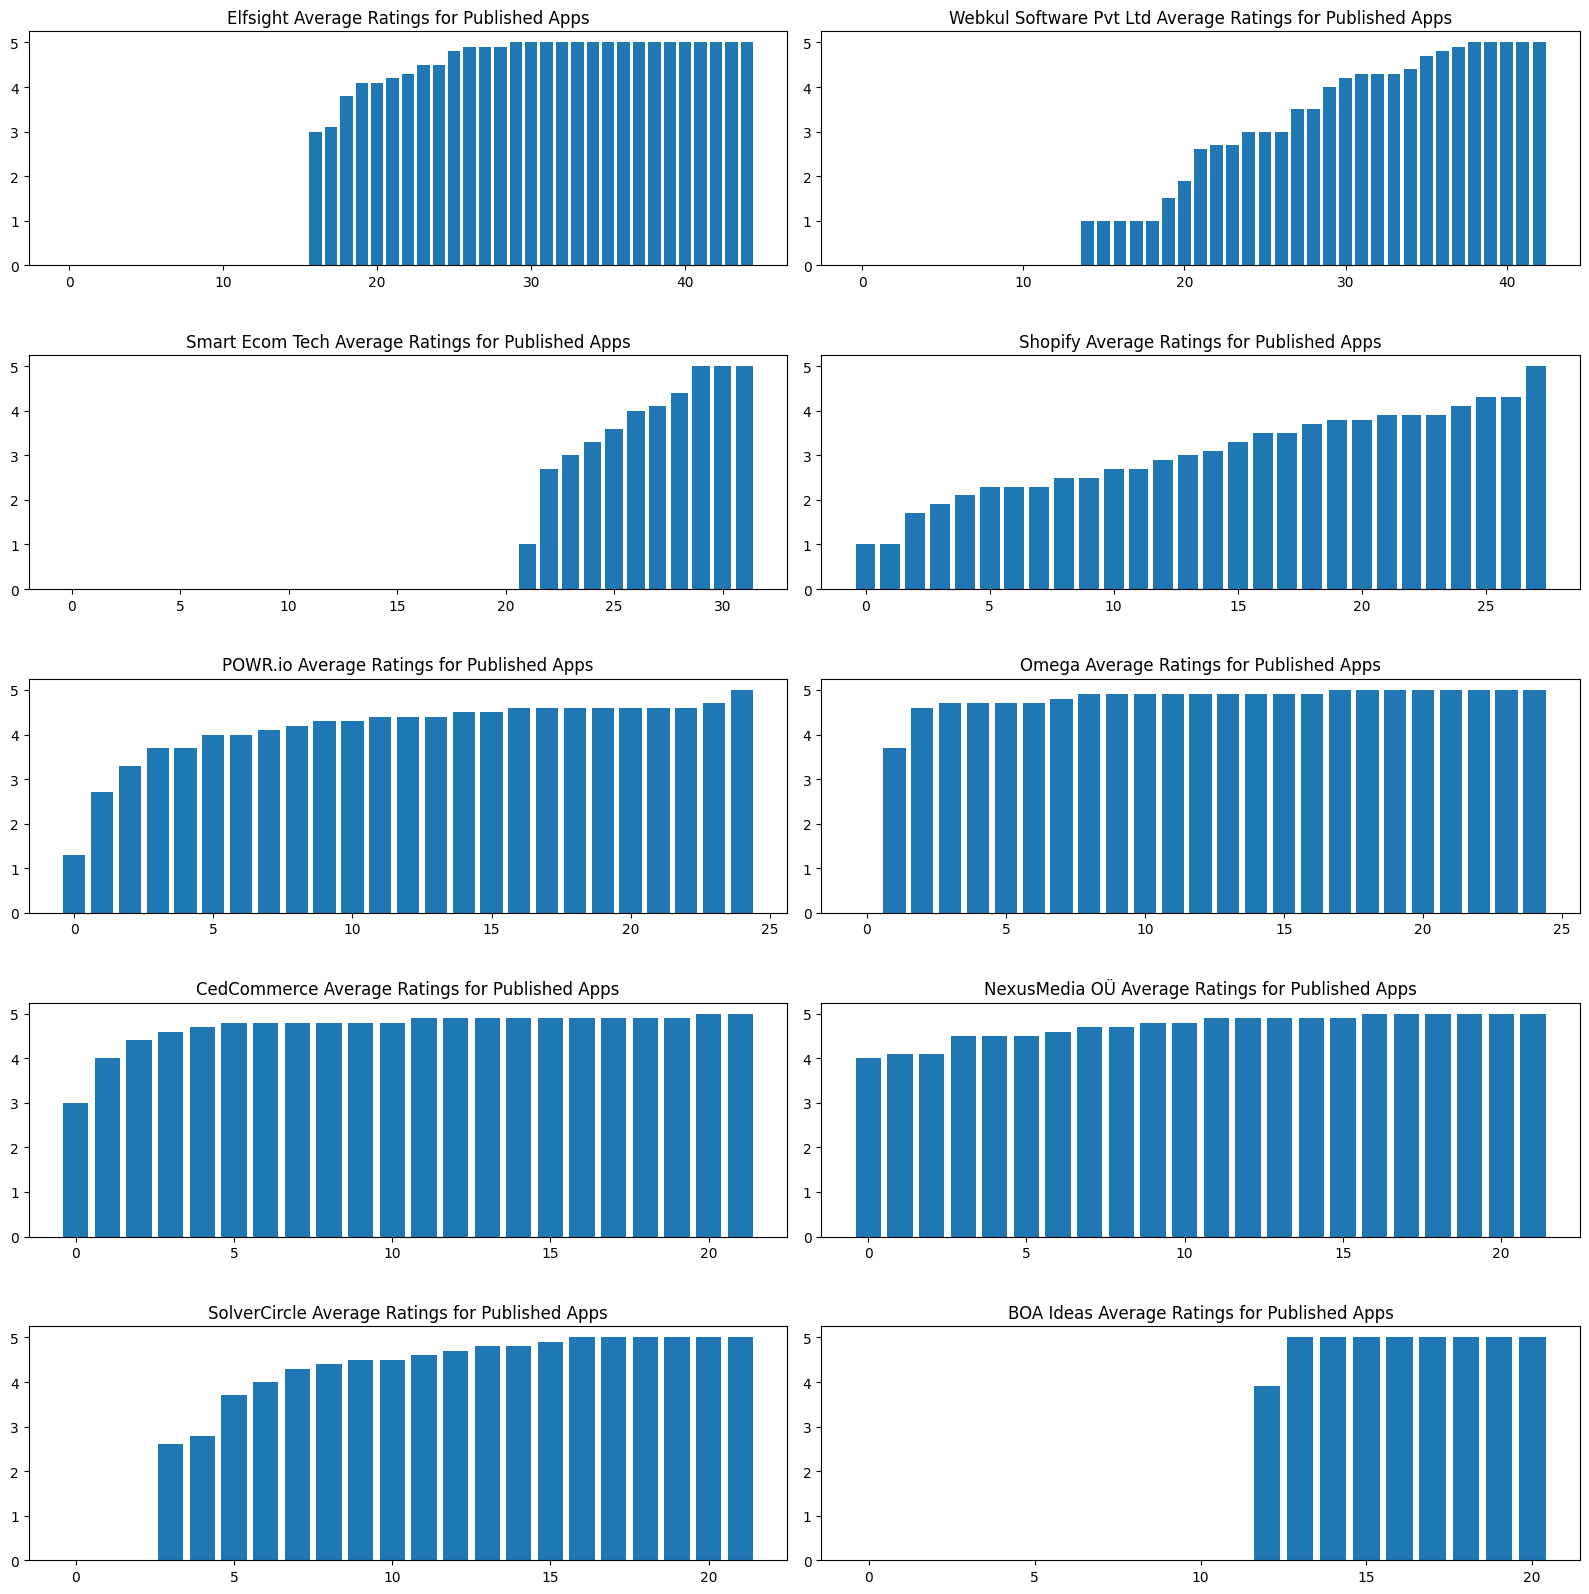

In [ ]:
# Medium-Large Publishers with the Most Well-Received Applications
# Medium-Large Publishers 20 or more published apps
# Well-Receieved Applications average rating of all published apps > 3.0

published_apps_floor = 20
pos = 1

plt.figure(figsize=(16, 32))

published_more_than_ten_df = most_published_developers_df.loc[
    most_published_developers_df["Number of Published Apps"] >= published_apps_floor
]

for developer in published_more_than_ten_df.Developer:
    published_apps = apps_grouped.get_group(developer)["rating"]
    published_apps = published_apps.sort_values(ascending=True)

    plt.tight_layout(h_pad=3)
    plt.subplot(10, 2, pos)
    plt.title(f'{developer} Average Ratings for Published Apps')
    plt.bar(x=np.arange(0, len(published_apps)), height=published_apps)
    pos += 1

#### The bar chart above indicates that many publishers applications have average ratings greater than 3.0. However, some publishers do not have any ratings for a substantial portion of their published apps. This is a result of many factors including cost of the application, if the application is up-to-date or supported and marketing of the applictation.

## Conclusion

### The Shopify Dataset 2022 allows for online shop owners interact with apps and show what features they need. Therefore, there is a great wealth of information to be gained by analyzing the  appstore. This data could be especially useful for niche analysis of certain market segments prior to application launch or the analysis of the market overall.

In [39]:
from google.colab import userdata



/bin/bash: line 1: usr: No such file or directory
